# КВБО-01-21 Марченко Сергей

# 1
## Представьте собственные данные и постройте эктраполяцию полиномами первой, второй и третьей степени.

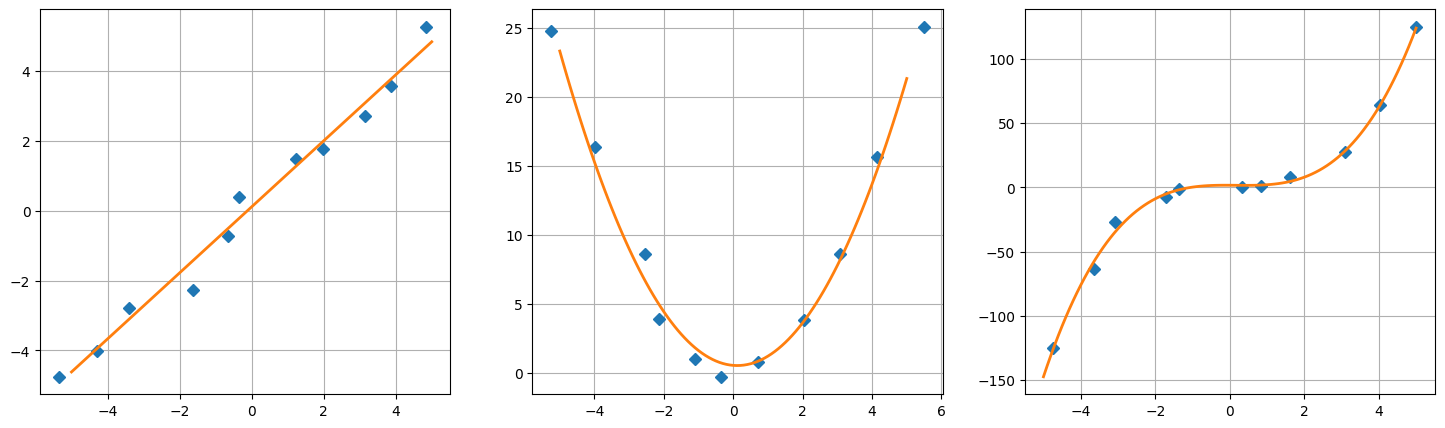

In [4]:
import matplotlib.pyplot as plt
from numpy import *
from numpy.random import *

delta = 1.0
sample_size = 11
x_prec = linspace(-5, 5, 101)
plt.figure(figsize=(18, 5))
rng = default_rng()

# First order
x = linspace(-5, 5, sample_size)
y = x + delta * (rng.random(sample_size) - .5)
x += delta * (rng.random(sample_size) - 0.5)

m = vstack([x, ones(sample_size)]).T
s = linalg.lstsq(m, y, rcond=None)[0]

plt.subplot(131)
plt.plot(x, y, 'D')
plt.plot(x_prec, s[0] * x_prec + s[1], '-', lw=2)
plt.grid()

# Second order
x = linspace(-5, 5, sample_size)
y = x ** 2 + delta * (rng.random(sample_size) - .5)
x += delta * (rng.random(sample_size) - 0.5)

m = vstack([x ** 2, x, ones(sample_size)]).T
s = linalg.lstsq(m, y, rcond=None)[0]

plt.subplot(132)
plt.plot(x, y, 'D')
plt.plot(x_prec, s[0] * x_prec ** 2 + s[1] * x_prec + s[2], '-', lw=2)
plt.grid()

# Third order
x = linspace(-5, 5, sample_size)
y = x ** 3 + delta * (rng.random(sample_size) - .5)
x += delta * (rng.random(sample_size) - 0.5)

m = vstack([x ** 3, x ** 2, x, ones(sample_size)]).T
s = linalg.lstsq(m, y, rcond=None)[0]

plt.subplot(133)
plt.plot(x, y, 'D')
plt.plot(x_prec, s[0] * x_prec ** 3 + s[1] * x_prec ** 2 + s[2] * x_prec + s[3], '-', lw=2)
plt.grid()

plt.show()

# 2
## Подставьте собственные данные и поэкспериментируйте с представленными функциями. Проанализируйте динамику изменения данных.

𝑓(𝑥, 𝑏) = 𝑏₀ + 𝑏₁𝑥
Beta optimization:  [0.60678116 0.72115558]
Linear deviance:    7.74283445489274e-06
Quadratic deviance: 0.009119735688383685

𝑓(𝑥, 𝑏) = 𝑏₀ + 𝑏₁𝑥 + 𝑏₂𝑥²
Beta optimization:  [0.74120917 0.83353173 0.27032664]
Linear deviance:    7.348586403962029e-06
Quadratic deviance: 0.008467687460721497

𝑓(𝑥, 𝑏) = 𝑏₀ + 𝑏₁𝑙𝑛(𝑥)
Beta optimization:  [0.45956904 0.70025927]
Linear deviance:    4.811926942801343e-06
Quadratic deviance: 0.011545350273383825

𝑓(𝑥, 𝑏) = 𝑏₀𝑥^𝑏₁
Beta optimization:  [0.64199817 0.48043735]
Linear deviance:    2.2506260018230482e-06
Quadratic deviance: 0.007683052074530738


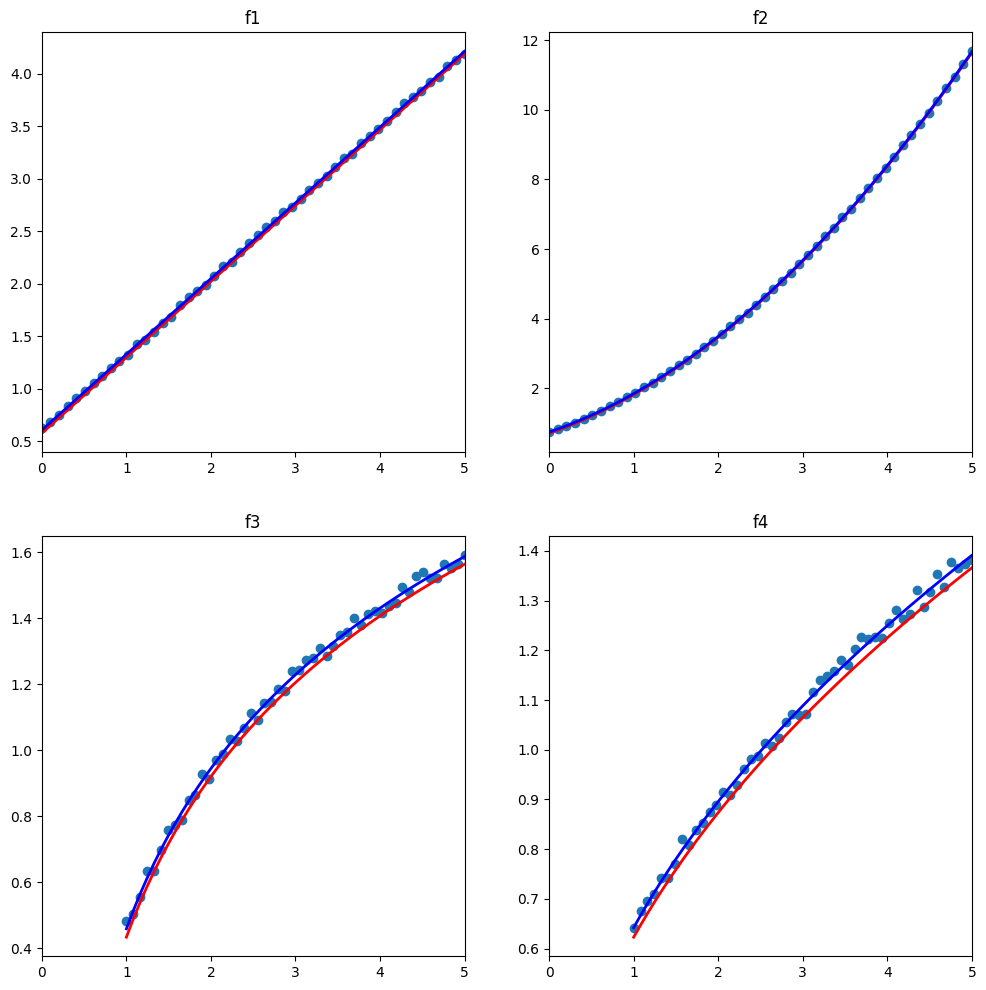

In [39]:
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt


def f1(x, b0, b1):
    return b0 + b1 * x


def f2(x, b0, b1, b2):
    return b0 + b1 * x + b2 * x ** 2


def f3(x, b0, b1):
    return b0 + b1 * np.log(x)


def f4(x, b0, b1):
    return b0 * x ** b1


def process_function(x, f, beta, ax):
    y = f(x, *beta)

    y_data = y + 0.05 * rng.random(len(x))
    beta_opt, beta_cov = sp.optimize.curve_fit(f, x, y_data)

    print(f'Beta optimization:  {beta_opt}')
    print(f'Linear deviance:    {sum(beta_cov)}')
    print(f'Quadratic deviance: {sum(((y_data - f(x, *beta_opt)) ** 2))}')

    ax.scatter(x, y_data)
    ax.plot(x, y, 'r', lw=2)
    ax.plot(x, f(x, *beta_opt), 'b', lw=2)
    ax.set_xlim(0, 5)
    ax.set_title(f.__name__)


rng = np.random.default_rng()
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
ax1, ax2, ax3, ax4 = np.array(axes).flatten()

x_data_0 = np.linspace(0, 5, 50)
x_data_1 = np.linspace(1, 5, 50)

print('𝑓(𝑥, 𝑏) = 𝑏₀ + 𝑏₁𝑥')
process_function(x_data_0, f1, rng.random(2), ax1)
print('\n𝑓(𝑥, 𝑏) = 𝑏₀ + 𝑏₁𝑥 + 𝑏₂𝑥²')
process_function(x_data_0, f2, rng.random(3), ax2)
print('\n𝑓(𝑥, 𝑏) = 𝑏₀ + 𝑏₁𝑙𝑛(𝑥)')
process_function(x_data_1, f3, rng.random(2), ax3)
print('\n𝑓(𝑥, 𝑏) = 𝑏₀𝑥^𝑏₁')
process_function(x_data_1, f4, rng.random(2), ax4)

plt.show()